In [1]:
import freyberg_trial_and_error as frey_mod
import pyemu
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

In [2]:
frey_mod.setup_model();

['.DS_Store', 'botm.ref', 'extract_zone_array.py', 'forecasts_true.csv', 'freyberg.bas', 'freyberg.dbf', 'freyberg.dis', 'freyberg.hds', 'freyberg.heads', 'freyberg.heads_potobs.ins', 'freyberg.hyd', 'freyberg.list', 'freyberg.locations', 'freyberg.mpbas', 'freyberg.mpenpt', 'freyberg.mplist', 'freyberg.mpnam', 'freyberg.mppthln', 'freyberg.mpsim', 'freyberg.oc', 'freyberg.pcg', 'freyberg.rivflux', 'freyberg.shp', 'freyberg.shx', 'freyberg.travel', 'freyberg.truth.lpf', 'freyberg.truth.nam', 'freyberg.truth.rch', 'freyberg.truth.riv', 'freyberg.truth.wel', 'hk.truth.ref', 'hk.zones', 'ibound.ref', 'inschek', 'inschek.exe', 'kzone.ref', 'mf2005', 'mf2005.exe', 'mfnwt', 'mp6', 'mp6.exe', 'mpath.in', 'pest++.exe', 'pestchek', 'pestchek.exe', 'pestpp', 'potobs_group.csv', 'Process_output.py', 'really_noisy_heads.txt', 'run_true_model.py', 'strt.ref', 'sweep', 'sweep.exe', 'tempchek', 'tempchek.exe', 'Weights_and_best_PHI.xlsx']

changing model workspace...
   freyberg_trialerror
FloPy is u

In [3]:
frey_mod.setup_pest()

FileNotFoundError: [Errno 2] No such file or directory: 'freyberg.list.truth.ins' -> 'freyberg.list.truth'

In [8]:
df_wb = pyemu.gw_utils.apply_mflist_budget_obs('freyberg_trialerror/freyberg.list.truth')

In [9]:
df_wb

(               in-out  percent_discrepancy  constant_head    recharge  \
 1970-01-02 -13.731900                -0.22       0.000000 -407.383911   
 1975-01-01   0.041016                 0.00      45.552601 -179.667801   
 1975-01-02   0.011719                 0.00       0.000000 -172.799194   
 
             river_leakage      storage        total      wells  
 1970-01-02   -1905.119995 -3706.027344  6004.799805 -13.731934  
 1975-01-01   -2381.399902 -1393.819336  3909.375000   0.041016  
 1975-01-02   -2381.399902 -1355.164551  3909.375000   0.011719  ,
              in-out  percent_discrepancy  constant_head       recharge  \
 1970-01-02 -13.7319                -0.22       0.000000    -407.383911   
 1975-01-01  61.0000                 0.00   83133.523438 -328301.156250   
 1975-01-02  61.0000                 0.00   83133.523438 -328473.968750   
 
             river_leakage       storage         total      wells  
 1970-01-02  -1.905120e+03 -3.706027e+03  6.004800e+03 -13.731934  

In [4]:
df_wb, df_ll = pyemu.gw_utils.apply_mflist_budget_obs('freyberg_trialerror/freyberg.list')

In [6]:
df2 = df_wb.append(df_ll)

In [7]:
df2

,in-out,percent_discrepancy,constant_head,recharge,river_leakage,storage,total,wells
1970-01-02,-9.915000,-0.15,0.0000,-280.790985,-2.000000e+03,-3.810374e+03,6081.250,-9.915039
1975-01-01,0.602500,0.01,43.9361,-71.645905,-2.381400e+03,-1.499663e+03,3909.375,0.602539
1975-01-02,0.008789,0.00,0.0000,-66.612396,-2.381400e+03,-1.461354e+03,3909.375,0.008789
1970-01-02,-9.915000,-0.15,0.0000,-280.790985,-2.000000e+03,-3.810374e+03,6081.250,-9.915039
1975-01-01,1089.000000,0.01,80183.3750,-131034.515625,-4.348055e+06,-2.740696e+06,7140691.000,1089.000000
1975-01-02,1089.000000,0.01,80183.3750,-131101.125000,-4.350436e+06,-2.742157e+06,7144600.500,1089.000000


In [4]:
frey_mod.run_respsurf()

In [5]:

df_in = pd.read_csv(os.path.join(frey_mod.WORKING_DIR, "sweep_in.csv"))
df_out = pd.read_csv(os.path.join(frey_mod.WORKING_DIR, "sweep_out.csv"))
resp_surf = np.zeros((frey_mod.NUM_STEPS_RESPSURF, frey_mod.NUM_STEPS_RESPSURF))

In [9]:
c = 0
for i, v1 in enumerate(df_in.hk1.unique()):
    for j, v2 in enumerate(df_in.rch_0.unique()):
        resp_surf[j, i] = df_out.loc[c, "phi"]
        c += 1


In [14]:
df_in.rch_0.unique()

array([ 0.5       ,  0.61111111,  0.72222222,  0.83333333,  0.94444444,
        1.05555556,  1.16666667,  1.27777778,  1.38888889,  1.5       ])

/Users/mnfienen/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:370: RuntimeWarning: invalid value encountered in true_divide
  dist = np.add.reduce(([(abs(s)[i] / L[i]) for i in range(xsize)]), -1)


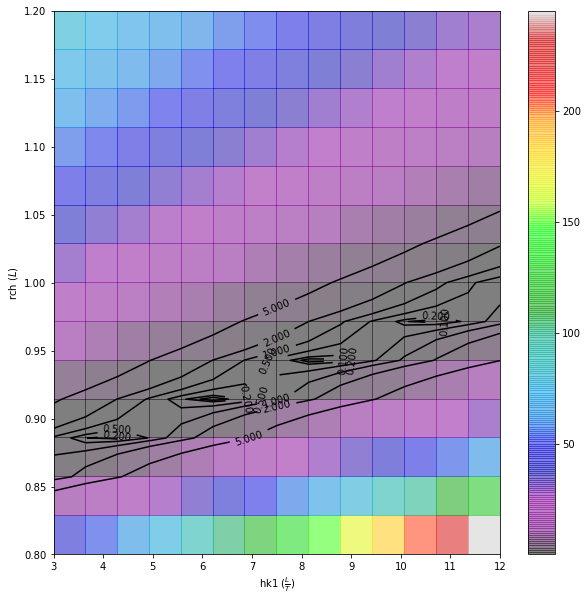

In [5]:
frey_mod.plot_response_surface()
plt.show()

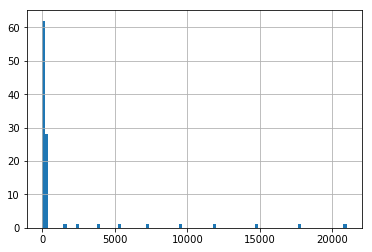

In [8]:
df_out.phi.hist(bins=100)
plt.show()